In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/data_m15.csv')

In [3]:
data.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-01 09:30:00-04:00,189.485001,189.919998,188.335007,188.979004,5046070,0.0,0.0
1,2023-09-01 09:45:00-04:00,188.979996,188.979996,188.279999,188.940002,2681980,0.0,0.0
2,2023-09-01 10:00:00-04:00,188.919998,189.490005,188.399994,189.240005,2559828,0.0,0.0
3,2023-09-01 10:15:00-04:00,189.240005,189.410004,188.940002,189.279999,1954224,0.0,0.0
4,2023-09-01 10:30:00-04:00,189.270004,189.279999,188.820007,189.100006,1496877,0.0,0.0


In [4]:
data['Price'] = data['Close']

In [5]:
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price
0,2023-09-01 09:30:00-04:00,189.485001,189.919998,188.335007,188.979004,5046070,0.0,0.0,188.979004
1,2023-09-01 09:45:00-04:00,188.979996,188.979996,188.279999,188.940002,2681980,0.0,0.0,188.940002
2,2023-09-01 10:00:00-04:00,188.919998,189.490005,188.399994,189.240005,2559828,0.0,0.0,189.240005
3,2023-09-01 10:15:00-04:00,189.240005,189.410004,188.940002,189.279999,1954224,0.0,0.0,189.279999
4,2023-09-01 10:30:00-04:00,189.270004,189.279999,188.820007,189.100006,1496877,0.0,0.0,189.100006
...,...,...,...,...,...,...,...,...,...
775,2023-10-13 14:45:00-04:00,179.104996,179.404999,178.968796,179.339905,1309908,0.0,0.0,179.339905
776,2023-10-13 15:00:00-04:00,179.330002,179.740005,179.089996,179.468903,1417715,0.0,0.0,179.468903
777,2023-10-13 15:15:00-04:00,179.460007,179.470001,178.850006,178.934998,1493039,0.0,0.0,178.934998
778,2023-10-13 15:30:00-04:00,178.940002,179.059998,178.520004,178.610001,1687781,0.0,0.0,178.610001


In [6]:
# Calculando o retorno diário
data['Return'] = data['Price'].pct_change()

# Define a estratégia de backtest (por exemplo, uma média móvel simples)
short_window = 10
long_window = 50

data['Short_MA'] = data['Price'].rolling(window=short_window).mean()
data['Long_MA'] = data['Price'].rolling(window=long_window).mean()

# Cria um sinal de compra (quando a média móvel curta cruza acima da longa) e um sinal de venda (quando a curta cruza abaixo da longa)
data['Signal'] = 0
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1

# Calcula os retornos da estratégia
data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']

# Calcula o retorno acumulado
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

# Visualiza os resultados
print(data)


                      Datetime        Open        High         Low  \
0    2023-09-01 09:30:00-04:00  189.485001  189.919998  188.335007   
1    2023-09-01 09:45:00-04:00  188.979996  188.979996  188.279999   
2    2023-09-01 10:00:00-04:00  188.919998  189.490005  188.399994   
3    2023-09-01 10:15:00-04:00  189.240005  189.410004  188.940002   
4    2023-09-01 10:30:00-04:00  189.270004  189.279999  188.820007   
..                         ...         ...         ...         ...   
775  2023-10-13 14:45:00-04:00  179.104996  179.404999  178.968796   
776  2023-10-13 15:00:00-04:00  179.330002  179.740005  179.089996   
777  2023-10-13 15:15:00-04:00  179.460007  179.470001  178.850006   
778  2023-10-13 15:30:00-04:00  178.940002  179.059998  178.520004   
779  2023-10-13 15:45:00-04:00  178.610001  179.089996  178.589996   

          Close   Volume  Dividends  Stock Splits       Price    Return  \
0    188.979004  5046070        0.0           0.0  188.979004       NaN   
1    188.

In [7]:
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price,Return,Short_MA,Long_MA,Signal,Strategy_Return,Cumulative_Return
0,2023-09-01 09:30:00-04:00,189.485001,189.919998,188.335007,188.979004,5046070,0.0,0.0,188.979004,NaN,NaN,NaN,0,NaN,NaN
1,2023-09-01 09:45:00-04:00,188.979996,188.979996,188.279999,188.940002,2681980,0.0,0.0,188.940002,-0.000206,NaN,NaN,0,-0.000000,1.000000
2,2023-09-01 10:00:00-04:00,188.919998,189.490005,188.399994,189.240005,2559828,0.0,0.0,189.240005,0.001588,NaN,NaN,0,0.000000,1.000000
3,2023-09-01 10:15:00-04:00,189.240005,189.410004,188.940002,189.279999,1954224,0.0,0.0,189.279999,0.000211,NaN,NaN,0,0.000000,1.000000
4,2023-09-01 10:30:00-04:00,189.270004,189.279999,188.820007,189.100006,1496877,0.0,0.0,189.100006,-0.000951,NaN,NaN,0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2023-10-13 14:45:00-04:00,179.104996,179.404999,178.968796,179.339905,1309908,0.0,0.0,179.339905,0.001339,178.952002,180.249253,-1,-0.001339,0.947342
776,2023-10-13 15:00:00-04:00,179.330002,179.740005,179.089996,179.468903,1417715,0.0,0.0,179.468903,0.000719,178.966891,180.250231,-1,-0.000719,0.946661
777,2023-10-13 15:15:00-04:00,179.460007,179.470001,178.850006,178.934998,1493039,0.0,0.0,178.934998,-0.002975,178.954391,180.233931,-1,0.002975,0.949477
778,2023-10-13 15:30:00-04:00,178.940002,179.059998,178.520004,178.610001,1687781,0.0,0.0,178.610001,-0.001816,178.957391,180.195731,-1,0.001816,0.951202


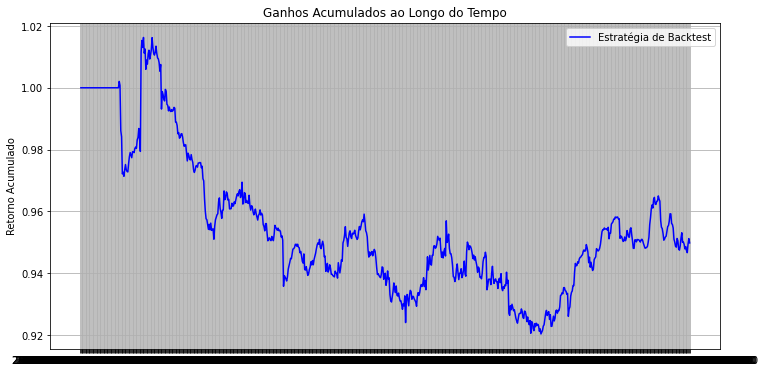

In [9]:
# Crie um gráfico de ganhos acumulados ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Cumulative_Return'], label='Estratégia de Backtest', color='blue')
#plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.title('Ganhos Acumulados ao Longo do Tempo')
plt.legend()
plt.grid(True)

# Mostra o gráfico
plt.show()


In [12]:
def backtest(data, short_window, long_window):
    # Calcula o retorno diário
    data['Return'] = data['Price'].pct_change()

    # Calcula as médias móveis
    data['Short_MA'] = data['Price'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Price'].rolling(window=long_window).mean()

    # Cria um sinal de compra (quando a média móvel curta cruza acima da longa) e um sinal de venda (quando a curta cruza abaixo da longa)
    data['Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
    data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1

    # Calcula os retornos da estratégia
    data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']

    # Calcula o retorno acumulado
    data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

    return data['Cumulative_Return'].iloc[-1]

In [13]:
# Teste diferentes combinações de médias móveis
short_window_values = [7, 9, 10, 20, 21, 50, 66]
long_window_values = [21, 40, 50, 100, 200]

results = []

for short_window in short_window_values:
    for long_window in long_window_values:
        final_return = backtest(data.copy(), short_window, long_window)
        results.append((short_window, long_window, final_return))

# Ordene os resultados para encontrar a melhor combinação
results.sort(key=lambda x: x[2], reverse=True)

# Imprima os resultados
for result in results:
    print(f"Short MA: {result[0]}, Long MA: {result[1]}, Return: {result[2]}")


Short MA: 50, Long MA: 40, Return: 1.0308010126211347
Short MA: 20, Long MA: 100, Return: 1.0246538491851616
Short MA: 21, Long MA: 100, Return: 1.0230544411175728
Short MA: 50, Long MA: 100, Return: 1.0199704554427318
Short MA: 66, Long MA: 200, Return: 1.012452029292356
Short MA: 50, Long MA: 200, Return: 1.006953508452381
Short MA: 7, Long MA: 21, Return: 1.004883484512214
Short MA: 10, Long MA: 100, Return: 1.000960829507511
Short MA: 21, Long MA: 21, Return: 1.0
Short MA: 50, Long MA: 50, Return: 1.0
Short MA: 21, Long MA: 50, Return: 0.9999403396697851
Short MA: 7, Long MA: 100, Return: 0.9998560125947757
Short MA: 7, Long MA: 50, Return: 0.9993324673178761
Short MA: 9, Long MA: 100, Return: 0.9985986830086445
Short MA: 50, Long MA: 21, Return: 0.9945898431980118
Short MA: 66, Long MA: 40, Return: 0.9931592938797158
Short MA: 21, Long MA: 200, Return: 0.9899448806867537
Short MA: 9, Long MA: 21, Return: 0.9809670413142592
Short MA: 66, Long MA: 100, Return: 0.9797377962334061
Sho

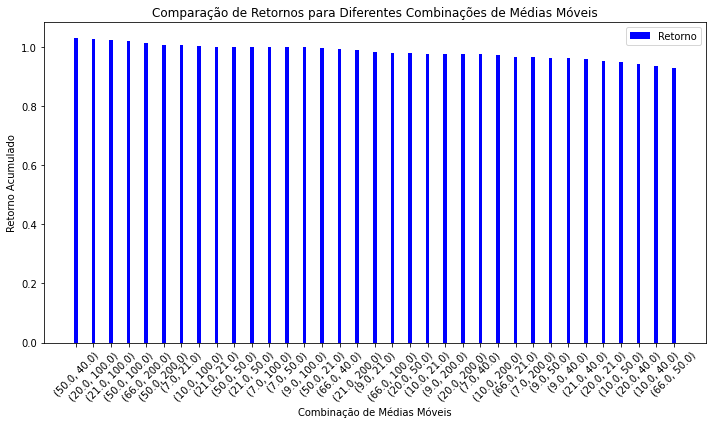

In [14]:
# Crie um DataFrame para facilitar a visualização
results_df = pd.DataFrame(results, columns=['Short_MA', 'Long_MA', 'Return'])

# Crie um gráfico de barras para visualizar os resultados
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(results_df))

# Crie barras para cada combinação de médias móveis
plt.bar(index, results_df['Return'], bar_width, label='Retorno', color='b')
plt.xlabel('Combinação de Médias Móveis')
plt.ylabel('Retorno Acumulado')
plt.title('Comparação de Retornos para Diferentes Combinações de Médias Móveis')
plt.xticks(index, [f"({row['Short_MA']}, {row['Long_MA']})" for index, row in results_df.iterrows()], rotation=45)
plt.legend()

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Crie um gráfico para comparar o desempenho ao longo do tempo
plt.figure(figsize=(12, 6))
for index, row in results_df.iterrows():
    short_window = row['Short_MA']
    long_window = row['Long_MA']
    strategy_data = backtest(data.copy(), short_window, long_window)
    plt.plot(data['Date'], strategy_data['Cumulative_Return'], label=f'Short_MA={short_window}, Long_MA={long_window}')

plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.title('Comparação do Desempenho de Diferentes Combinações de Médias Móveis ao Longo do Tempo')
plt.legend()
plt.grid(True)

# Mostra o gráfico
plt.show()

In [16]:
results_df

,Short_MA,Long_MA,Return
0,50,40,1.030801
1,20,100,1.024654
2,21,100,1.023054
3,50,100,1.019970
4,66,200,1.012452
5,50,200,1.006954
6,7,21,1.004883
7,10,100,1.000961
8,21,21,1.000000
9,50,50,1.000000
